# Визуализация
Выполнила: Остапчук Таисия Сергеевна, 121-ПМо

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

### Часть 1: EDA

In [3]:
# Загрузим использованный датасет tips
data = sns.load_dataset('tips')

print(f"{data.shape[0]} строк, {data.shape[1]} колонок")
print(data.columns.tolist())
print(data.dtypes)
print(data.isnull().sum())
print(data.describe())
print(data.head())

244 строк, 7 колонок
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    

### Часть 2: Matplotlib визуализации

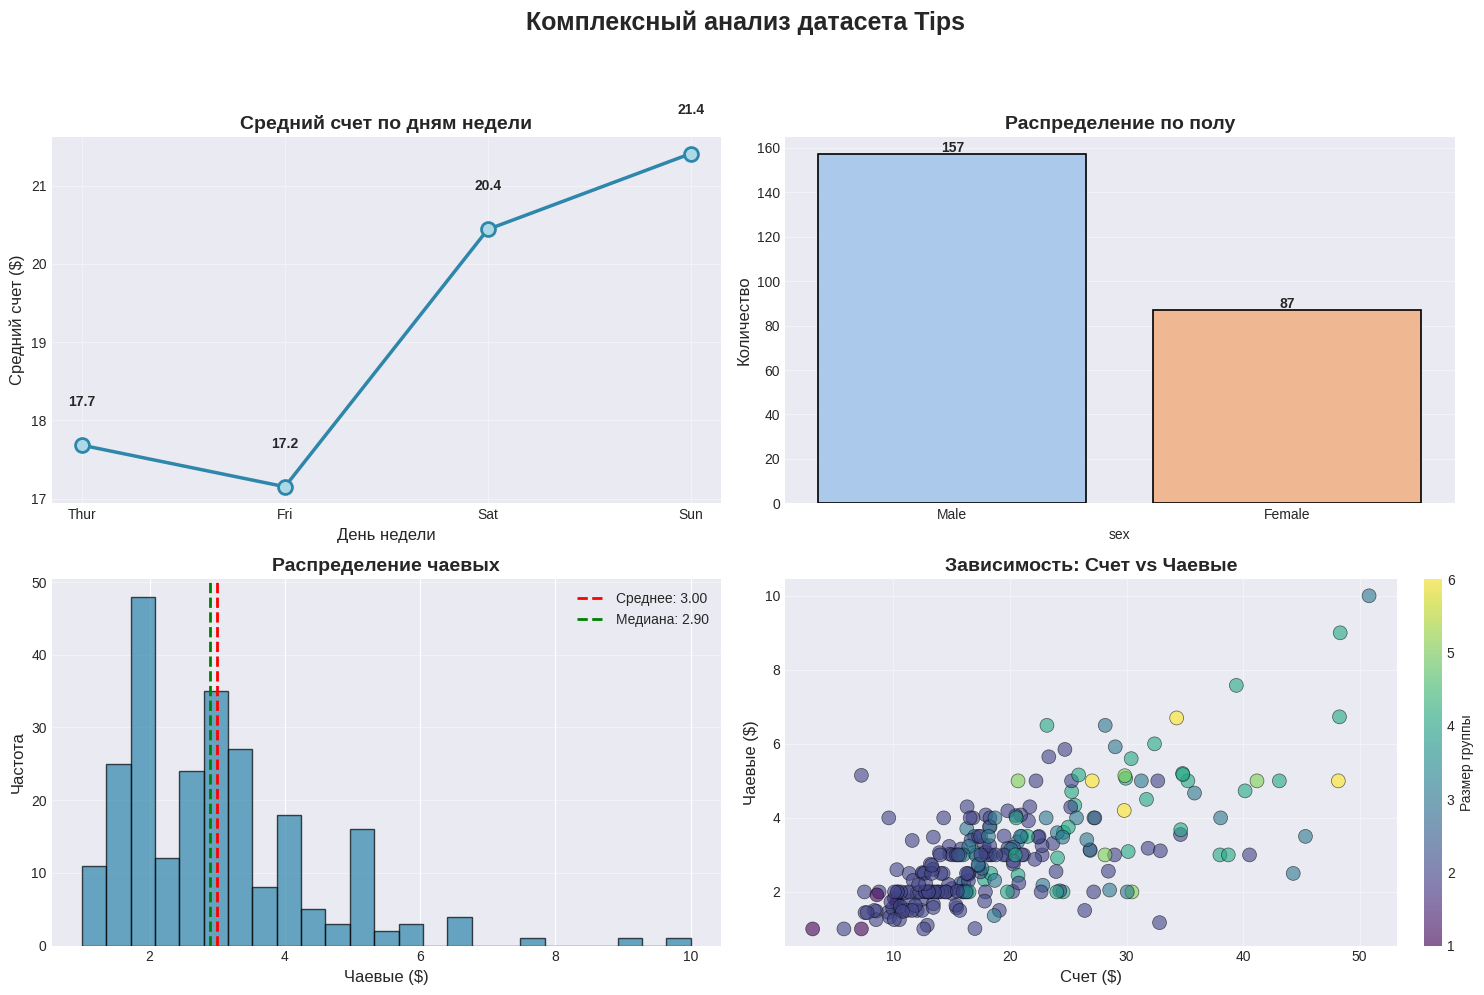

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Комплексный анализ датасета Tips', fontsize=18, fontweight='bold', y=1.02)

# График 1: Линейный - средний счет по дням
daily_avg = data.groupby('day')['total_bill'].mean()
days_order = ['Thur', 'Fri', 'Sat', 'Sun']
daily_avg = daily_avg.reindex(days_order)
axes[0, 0].plot(range(len(daily_avg)), daily_avg.values, marker='o', linewidth=2.5,
                color='#2E86AB', markersize=10, markerfacecolor='lightblue', markeredgewidth=2)
axes[0, 0].set_xticks(range(len(daily_avg)))
axes[0, 0].set_xticklabels(daily_avg.index)
axes[0, 0].set_title('Средний счет по дням недели', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('День недели', fontsize=12)
axes[0, 0].set_ylabel('Средний счет ($)', fontsize=12)
axes[0, 0].grid(True, alpha=0.4)
for i, v in enumerate(daily_avg.values):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=10, fontweight='bold')

# График 2: Столбчатая диаграмма - количество по полу
gender_counts = data['sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0, 1], palette='pastel', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('Распределение по полу', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Количество', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.4)
for bar in axes[0, 1].patches:
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                    f'{int(bar.get_height())}', ha='center', fontsize=10, fontweight='bold')

# График 3: Гистограмма - распределение чаевых
axes[1, 0].hist(data['tip'], bins=25, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(data['tip'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {data["tip"].mean():.2f}')
axes[1, 0].axvline(data['tip'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {data["tip"].median():.2f}')
axes[1, 0].set_title('Распределение чаевых', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Чаевые ($)', fontsize=12)
axes[1, 0].set_ylabel('Частота', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.4)

# График 4: Scatter plot - счет vs чаевые
scatter = axes[1, 1].scatter(data['total_bill'], data['tip'], c=data['size'], cmap='viridis',
                              s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Зависимость: Счет vs Чаевые', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Счет ($)', fontsize=12)
axes[1, 1].set_ylabel('Чаевые ($)', fontsize=12)
axes[1, 1].grid(True, alpha=0.4)
cbar = fig.colorbar(scatter, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar.set_label('Размер группы', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### Часть 3: Seaborn визуализации

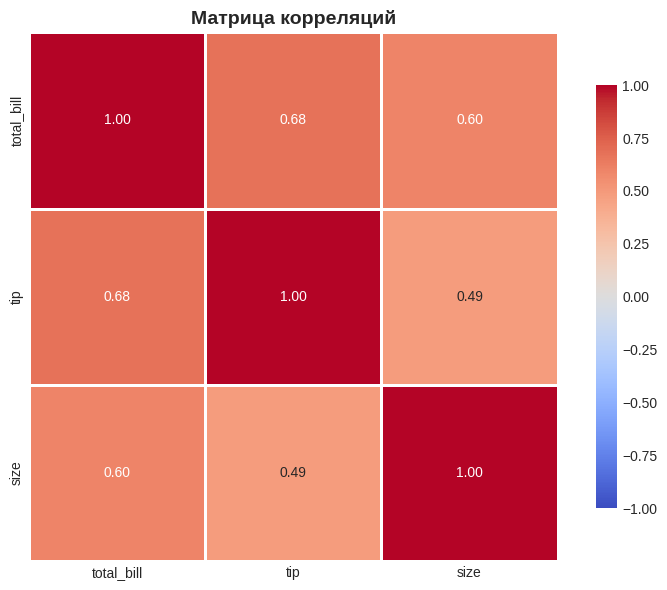

In [5]:
# 1. Heatmap корреляций
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляций', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

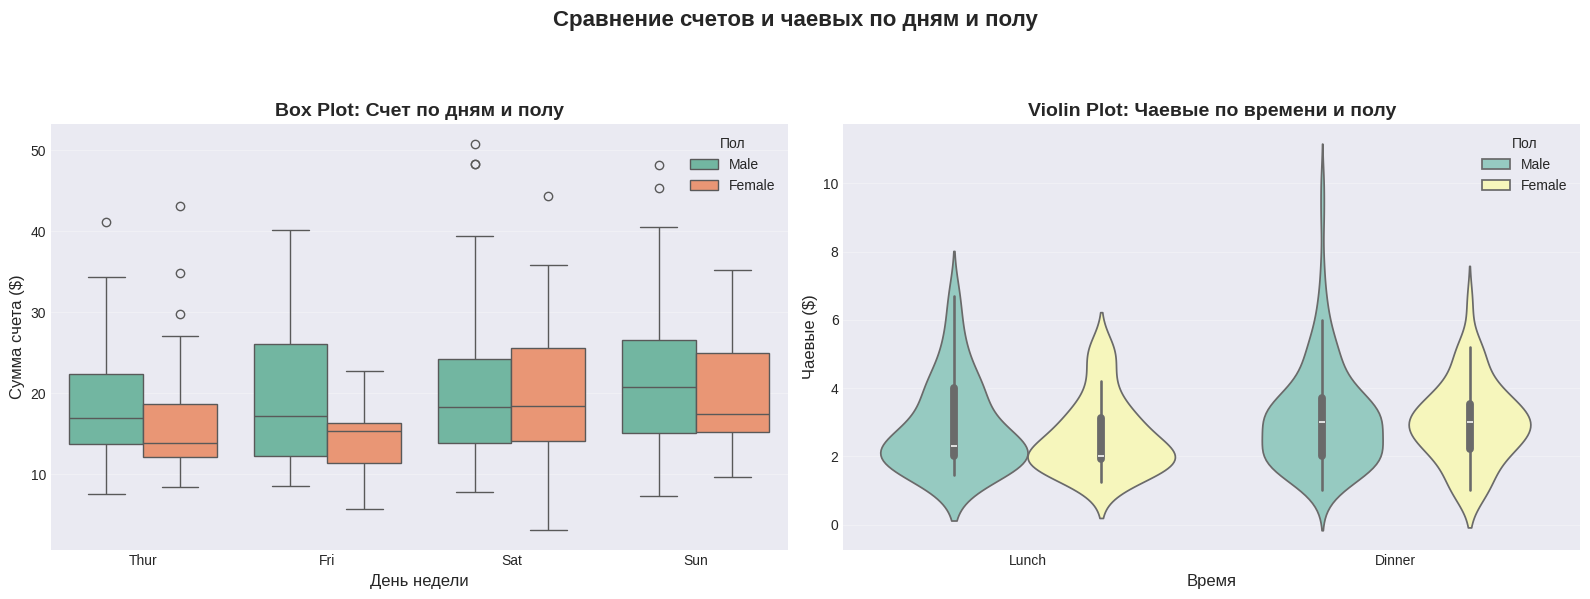

In [6]:
# 2. Box plots для сравнения групп
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Сравнение счетов и чаевых по дням и полу', fontsize=16, fontweight='bold', y=1.02)

# Упорядочиваем пол для последовательности
hue_order = ['Male', 'Female']

sns.boxplot(data=data, x='day', y='total_bill', hue='sex', ax=axes[0], palette='Set2', hue_order=hue_order)
axes[0].set_title('Box Plot: Счет по дням и полу', fontsize=14, fontweight='bold')
axes[0].set_xlabel('День недели', fontsize=12)
axes[0].set_ylabel('Сумма счета ($)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].legend(title='Пол')

sns.violinplot(data=data, x='time', y='tip', hue='sex', ax=axes[1], palette='Set3', hue_order=hue_order)
axes[1].set_title('Violin Plot: Чаевые по времени и полу', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Время', fontsize=12)
axes[1].set_ylabel('Чаевые ($)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend(title='Пол')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

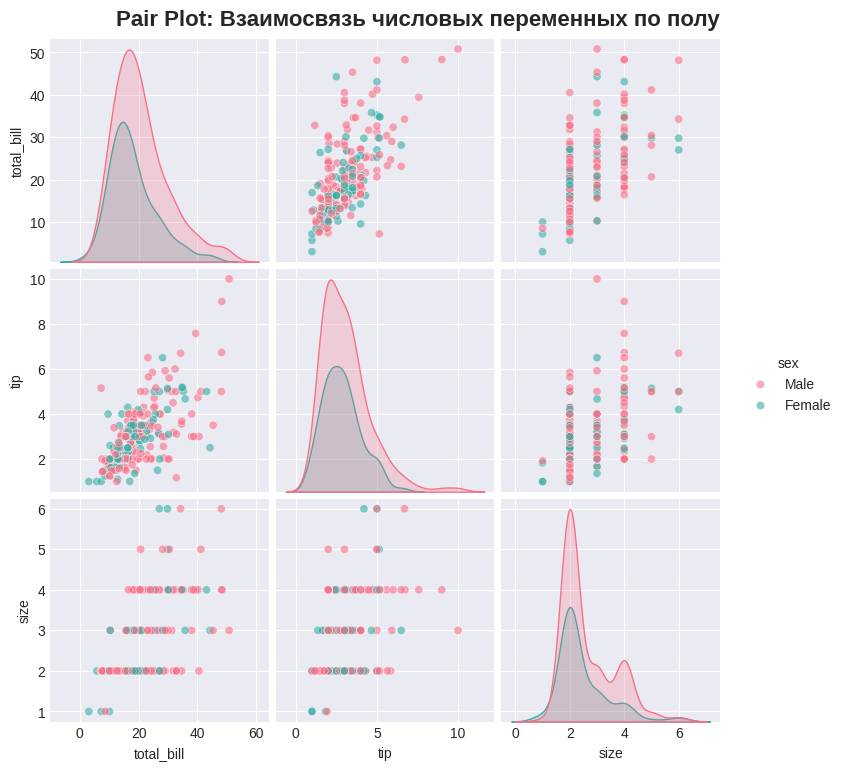

In [7]:
# 3. Pair plot
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
g = sns.pairplot(data[numeric_cols + ['sex']], hue='sex', palette='husl',
                  diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5) # Увеличен height для лучшей читаемости
g.fig.suptitle('Pair Plot: Взаимосвязь числовых переменных по полу', fontsize=16, fontweight='bold', y=1.02) # Увеличен шрифт заголовка и скорректирован Y-координат
plt.show()

### Часть 4: Plotly интерактивные графики

In [8]:
# Интерактивный Scatter Plot: Счет vs Чаевые, раскрашенный по времени дня
import plotly.express as px

fig_scatter = px.scatter(data, x='total_bill', y='tip', color='time', size='size',
                 hover_data=['day', 'sex'],
                 title='Интерактивный Scatter Plot: Счет vs Чаевые (по времени)',
                 labels={'total_bill': 'Сумма счета ($)', 'tip': 'Чаевые ($)', 'size': 'Размер группы'},
                 template='plotly_white')
fig_scatter.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_scatter.show()

In [9]:
# Интерактивный Bar Chart: Средний счет по дням недели

avg_bill_by_day = data.groupby('day')['total_bill'].mean().reset_index()
avg_bill_by_day['day'] = pd.Categorical(avg_bill_by_day['day'], categories=days_order, ordered=True)
avg_bill_by_day = avg_bill_by_day.sort_values('day')

fig_bar = px.bar(avg_bill_by_day, x='day', y='total_bill',
             title='Интерактивный Bar Chart: Средний счет по дням недели',
             labels={'day': 'День', 'total_bill': 'Средний счет ($)'},
             color='total_bill', # Раскраска по значению среднего счета
             color_continuous_scale='Plasma', # Измененная цветовая палитра
             template='plotly_white')
fig_bar.update_layout(showlegend=False)
fig_bar.show()

In [10]:
# Интерактивный Box Plot: Распределение чаевых по полу

fig_box = px.box(data, x='sex', y='tip', color='smoker',
            title='Интерактивный Box Plot: Распределение чаевых по полу (курящие/некурящие)',
            labels={'sex': 'Пол', 'tip': 'Чаевые ($)', 'smoker': 'Курящий'},
            template='plotly_white')
fig_box.show()

### Часть 5: Выводы

### 1. Ключевые находки и общие паттерны:

* Чем больше сумма счета и чем многочисленнее группа клиентов, тем выше сумма оставленных чаевых.
* Суббота и воскресенье демонстрируют самые высокие средние значения по `total_bill` и `tip`, что делает эти дни наиболее прибыльными для заведения.
* Мужчины в среднем тратят больше и оставляют несколько более высокие чаевые по сравнению с женщинами, хотя распределения пересекаются.
* Ужин стабильно показывает существенно более высокие средние счета и чаевые по сравнению с обедои.
* Гистограмма `tip` показывает, что большинство чаевых находится в диапазоне от 2 до 4 долларов, но присутствует значительное количество более крупных чаевых, формирующих "длинный хвост" распределения.

### 2. Специфичные паттерны и аномалии:

* `Box plot` и `Violin plot` показывают, что распределение чаевых в выходные дни (особенно в воскресенье) имеет больший разброс и медиану выше, чем в будни. Распределение чаевых на ужин также шире и выше, чем на обед.
* На графиках `Box plot` и `Scatter plot` заметны отдельные точки данных, которые значительно отличаются от основной массы (выбросы). Эти точки соответствуют очень высоким счетам или крайне щедрым чаевым, что может быть связано с крупными заказами или особыми случаями.
* Интерактивный Box Plot по `smoker` указывает, что хотя медианные чаевые для курящих и некурящих могут быть схожи, у курящих клиентов иногда наблюдается более широкий диапазон чаевых, что может указывать на большее разнообразие в их поведении.
## 3. Рекомендации:

1.  Учитывая максимальную прибыль в выходные дни (суббота и воскресенье) и во время ужинов, следует рассмотреть возможность усиления персонала, предложения специальных акций или развлекательных программ в эти периоды для привлечения еще большего количества клиентов и улучшения качества обслуживания в пиковые часы.

2.  Необходимо постоянно обучать персонал высокому уровню обслуживания, особенно для больших групп и в вечернее время, так как это напрямую влияет на удовлетворенность клиентов и, как следствие, на размер чаевых.

3.  Рассмотреть возможность корректировки меню или ценовых предложений для разных времен суток (обед/ужин) или дней недели, чтобы стимулировать спрос в менее прибыльные периоды, не снижая при этом доходность пиковых часов.